In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import h5py
import scipy
from torch.utils.data import Dataset, DataLoader

In [15]:
class DTDPHI_9Dinput_q7a5M40(Dataset):
    def __init__(self, h5file, index, transform=None):
        
        with h5py.File(h5file, "r") as f:
            a1 = torch.tensor(list(f['source_parameters']['a_1'])) * 2
            a2 = torch.tensor(list(f['source_parameters']['a_2'])) * 2
            chirp_mass = (torch.tensor(list(f['source_parameters']['chirp_mass'])) - 17) * 2
            mass_ratio = (torch.tensor(list(f['source_parameters']['mass_ratio'])) - 0.7) * 3
            phi_12 = torch.tensor(list(f['source_parameters']['phi_12'])) / np.pi
            phi_jl = torch.tensor(list(f['source_parameters']['phi_jl'])) / np.pi
            theta_jn = torch.tensor(list(f['source_parameters']['theta_jn'])) / np.pi
            tilt_1 = torch.tensor(list(f['source_parameters']['tilt_1'])) / np.pi
            tilt_2 = torch.tensor(list(f['source_parameters']['tilt_2'])) / np.pi
            self.x = torch.stack((chirp_mass,mass_ratio,a1,a2,phi_12,phi_jl,theta_jn,tilt_1,tilt_2),dim=1)
            
            
            
            dphi = torch.tensor(list(f['outputs']['dphi'])) / (2*np.pi)
            dt = (torch.tensor(list(f['outputs']['dt'])) / 0.01 + 0.4) * 25
            self.y = torch.stack((dphi,dt),dim=1)
            
        self.transform = transform
        
    def __len__(self):
        return self.y.shape[0]
    
    def __getitem__(self, index):
        
        if self.transform is not None:
            pass
                                      
        return self.x[index], self.y[index]
    
    
class DTDPHI_8Dinput_q7a5M40(Dataset):
    def __init__(self, h5file, index, transform=None):
        
        with h5py.File(h5file, "r") as f:
            a1 = torch.tensor(list(f['source_parameters']['a_1'])) * 2
            a2 = torch.tensor(list(f['source_parameters']['a_2'])) * 2
            #chirp_mass = (torch.tensor(list(f['source_parameters']['chirp_mass'])) - 17) * 2
            mass_ratio = (torch.tensor(list(f['source_parameters']['mass_ratio'])) - 0.7) * 3
            phi_12 = torch.tensor(list(f['source_parameters']['phi_12'])) / np.pi
            phi_jl = torch.tensor(list(f['source_parameters']['phi_jl'])) / np.pi
            theta_jn = torch.tensor(list(f['source_parameters']['theta_jn'])) / np.pi
            tilt_1 = torch.tensor(list(f['source_parameters']['tilt_1'])) / np.pi
            tilt_2 = torch.tensor(list(f['source_parameters']['tilt_2'])) / np.pi
            #self.x = torch.stack((chirp_mass,mass_ratio,a1,a2,phi_12,phi_jl,theta_jn,tilt_1,tilt_2),dim=1)
            self.x = torch.stack((mass_ratio,a1,a2,phi_12,phi_jl,theta_jn,tilt_1,tilt_2),dim=1)
            
            
            dphi = torch.tensor(list(f['outputs']['dphi'])) / (2*np.pi)
            dt = (torch.tensor(list(f['outputs']['dt'])) / 0.01 + 0.4) * 25
            self.y = torch.stack((dphi,dt),dim=1)
            
        self.transform = transform
        
    def __len__(self):
        return self.y.shape[0]
    
    def __getitem__(self, index):
        
        if self.transform is not None:
            pass
                                      
        return self.x[index], self.y[index]

    
class DTDPHI_5Dinput_q10a99M40(Dataset):
    def __init__(self, h5file, index, transform=None, mode='plus'):
        
        with h5py.File(h5file, "r") as f:
            a1 = torch.tensor(list(f['source_parameters']['a_1'])) 
            a2 = torch.tensor(list(f['source_parameters']['a_2'])) 
            mass_ratio = torch.tensor(list(f['source_parameters']['mass_ratio']))
            theta_jn = torch.tensor(list(f['source_parameters']['theta_jn'])) / np.pi
            f_ref = (torch.tensor(list(f['source_parameters']['f_ref'])) - 5 )/195
            self.x = torch.stack((mass_ratio,a1,a2,theta_jn,f_ref),dim=1)
            
            
            dphi = torch.tensor(list(f['outputs'][f'dphi_{mode}'])) / np.pi
            dt = (torch.tensor(list(f['outputs'][f'dt_{mode}'])) + 0.0007)/0.005
            print(f"min dphi: {min(dphi)}, max dphi: {max(dphi)}")
            print(f"min dt: {min(dt)}, max dt: {max(dt)}")
            self.y = torch.stack((dphi,dt),dim=1)
            
        self.transform = transform
        
    def __len__(self):
        return self.y.shape[0]
    
    def __getitem__(self, index):
        
        if self.transform is not None:
            pass
                                      
        return self.x[index], self.y[index]

In [18]:
N=1000
h5filename = 'dtdphi_8D_q7a5M40_IMREOB_P.h5'

rand_index = np.random.permutation(N)
train_index = rand_index[:700]
valid_index = rand_index[700:850]
test_index = rand_index[850:]

#train_dataset = DTDPHI_9Dinput_q7a5M40(h5filename, train_index)
#valid_dataset = DTDPHI_9Dinput_q7a5M40(h5filename, valid_index)
#test_dataset = DTDPHI_9Dinput_q7a5M40(h5filename, test_index)
#train_dataset = DTDPHI_8Dinput_q7a5M40(h5filename, train_index)
#valid_dataset = DTDPHI_8Dinput_q7a5M40(h5filename, valid_index)
#test_dataset = DTDPHI_8Dinput_q7a5M40(h5filename, test_index)
h5filename = 'dtdphi_5D_q10a99M40_IMREOB_ASHM.h5'
mode='plus'
#mode='cross'
train_dataset = DTDPHI_5Dinput_q10a99M40(h5filename, train_index, mode=mode)
valid_dataset = DTDPHI_5Dinput_q10a99M40(h5filename, valid_index, mode=mode)
test_dataset = DTDPHI_5Dinput_q10a99M40(h5filename, test_index, mode=mode)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_dataset, batch_size=8, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=True, num_workers=0)

min dphi: -0.9988652621129396, max dphi: 0.9987961027709069
min dt: 1.6617650965130779e-06, max dt: 0.9277290693599548
min dphi: -0.9988652621129396, max dphi: 0.9987961027709069
min dt: 1.6617650965130779e-06, max dt: 0.9277290693599548
min dphi: -0.9988652621129396, max dphi: 0.9987961027709069
min dt: 1.6617650965130779e-06, max dt: 0.9277290693599548


In [19]:
for i in range(100):
    print(valid_dataset[i][1])

tensor([-0.0423,  0.1350], dtype=torch.float64)
tensor([-0.6617,  0.2045], dtype=torch.float64)
tensor([0.1953, 0.4547], dtype=torch.float64)
tensor([0.1622, 0.0809], dtype=torch.float64)
tensor([0.6063, 0.1282], dtype=torch.float64)
tensor([0.9592, 0.2914], dtype=torch.float64)
tensor([0.5382, 0.1839], dtype=torch.float64)
tensor([-0.4234,  0.0626], dtype=torch.float64)
tensor([0.9673, 0.0992], dtype=torch.float64)
tensor([0.5482, 0.3319], dtype=torch.float64)
tensor([-0.3844,  0.1877], dtype=torch.float64)
tensor([-0.5388,  0.1053], dtype=torch.float64)
tensor([-0.4913,  0.3304], dtype=torch.float64)
tensor([0.3203, 0.6042], dtype=torch.float64)
tensor([0.5894, 0.1495], dtype=torch.float64)
tensor([-0.6929,  0.4654], dtype=torch.float64)
tensor([-0.4493,  0.1846], dtype=torch.float64)
tensor([0.4012, 0.3052], dtype=torch.float64)
tensor([-0.1948,  0.2159], dtype=torch.float64)
tensor([0.1175, 0.0717], dtype=torch.float64)
tensor([0.6239, 0.1091], dtype=torch.float64)
tensor([-0.0406,

In [23]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(5, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.Tanh(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.Tanh(),
            nn.Linear(128, 2)
        )


    def forward(self, x):
        return self.layers(x)

In [26]:
mlp = MLP()
  
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3)

In [27]:
mean_train_losses = []
mean_valid_losses = []
valid_acc_list = []
epochs = 2000

checkpoint_filename = "checkpoint_XHMv4HM_5d_q10a99.pickle"
best_epoch = 0
print("Training started.")
for epoch in range(epochs):
    mlp.train()
    
    train_losses = []
    valid_losses = []
    for i, data in enumerate(train_loader):
        inputs, targets = data
        inputs, targets = inputs.float(), targets.float()
        
        optimizer.zero_grad()
        
        outputs = mlp(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())
        
        #if (i * 128) % (128 * 100) == 0:
        #    print(f'{i * 128} / 50000')
            
    mlp.eval()

    with torch.no_grad():
        for i, data in enumerate(valid_loader):
            inputs_valid, targets_valid = data
            inputs_valid, targets_valid = inputs_valid.float(), targets_valid.float()
            
            outputs_valid = mlp(inputs_valid)
            loss_valid = loss_function(outputs_valid, targets_valid)
            
            valid_losses.append(loss_valid.item())
    
    if epoch>0:
        if np.mean(valid_losses)<min(mean_valid_losses):
            torch.save(mlp.state_dict(), checkpoint_filename)
            best_epoch = epoch

    mean_train_losses.append(np.mean(train_losses))
    mean_valid_losses.append(np.mean(valid_losses))
    
    if not epoch%200 or epoch==(epochs-1):
        print('epoch : {}, train loss : {:.8f}, valid loss : {:.8f}'\
             .format(epoch, np.mean(train_losses), np.mean(valid_losses)))
print("Training finished.")
print(f"Loading from the best epoch: {best_epoch}, best loss: {min(mean_valid_losses)}")
mlp.load_state_dict(torch.load(checkpoint_filename))

Training started.
epoch : 0, train loss : 0.16948467, valid loss : 0.16744432
epoch : 200, train loss : 0.13692221, valid loss : 0.13235742
epoch : 400, train loss : 0.10915244, valid loss : 0.10284704
epoch : 600, train loss : 0.09251080, valid loss : 0.08943864
epoch : 800, train loss : 0.07560400, valid loss : 0.07261178
epoch : 1000, train loss : 0.05458260, valid loss : 0.05577179


KeyboardInterrupt: 

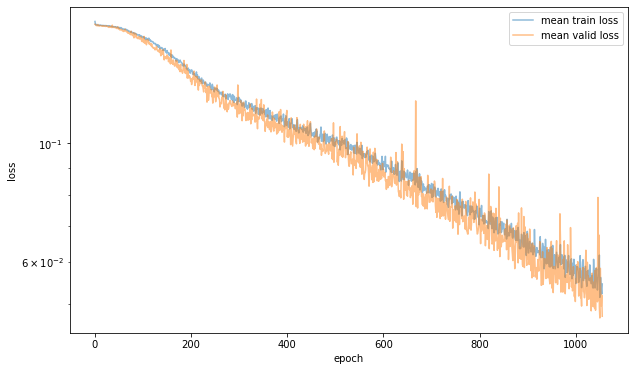

In [28]:
plt.figure(figsize=(10,6))
plt.plot(mean_train_losses, label='mean train loss',alpha=0.5)
plt.plot(mean_valid_losses, label='mean valid loss',alpha=0.5)
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.yscale('log')
plt.show()

In [62]:
test_losses = []

true_dt = []
true_dphi = []

predicted_dt = []
predicted_dphi = []
mlp.eval()
with torch.no_grad():
    for testid in test_index:
        inputs_test, targets_test = test_dataset[testid]
        inputs_test, targets_test = inputs_test.float(), targets_test.float()
        
        true_dphi.append(targets_test[0]*2*np.pi)
        true_dt.append((targets_test[1]/25-0.4)*0.01)
        
        outputs_test = mlp(inputs_test)
        predicted_dphi.append(outputs_test[0]*2*np.pi)
        predicted_dt.append((outputs_test[1]/25-0.4)*0.01)
        
        loss_test = loss_function(outputs_test, targets_test)
        test_losses.append(loss_valid.item())
        
true_dt = np.array(true_dt)
true_dphi = np.array(true_dphi)
predicted_dt = np.array(predicted_dt)
predicted_dphi = np.array(predicted_dphi)

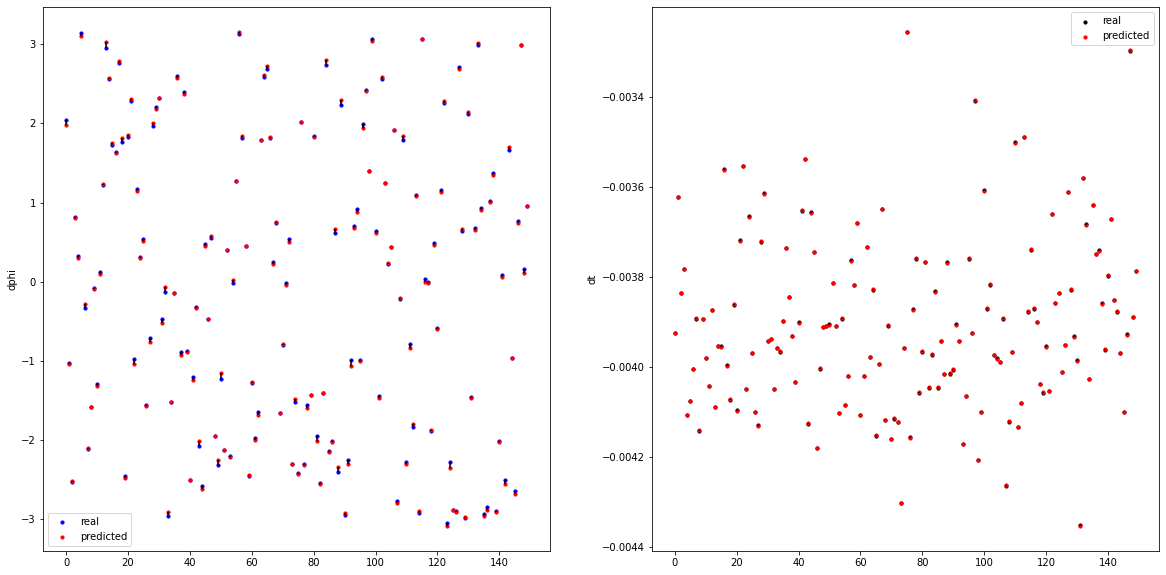

In [50]:
plt.figure(figsize=(20,10))
scatter_size = 10

plt.subplot(1,2,1)
plt.scatter(np.arange(len(test_index)), true_dphi,label='real',color='b',s=scatter_size)
plt.scatter(np.arange(len(test_index)), predicted_dphi,label='predicted',s=scatter_size,color='r')
for i in range(len(test_index)):
    plt.vlines(x=np.arange(len(test_index))[i], 
               ymin=min(true_dphi[i],predicted_dphi[i]), ymax=max(true_dphi[i],predicted_dphi[i]), color='k')
plt.ylabel('dphi')
plt.legend()


plt.subplot(1,2,2)
plt.scatter(np.arange(len(test_index)), true_dt,label='real',color='k',s=scatter_size)
plt.scatter(np.arange(len(test_index)), predicted_dt,label='predicted',s=scatter_size,color='r')
for i in range(len(test_index)):
    plt.vlines(x=np.arange(len(test_index))[i], 
               ymin=min(true_dt[i],predicted_dt[i]), ymax=max(true_dt[i],predicted_dt[i]), color='k')
plt.ylabel('dt')
plt.legend()

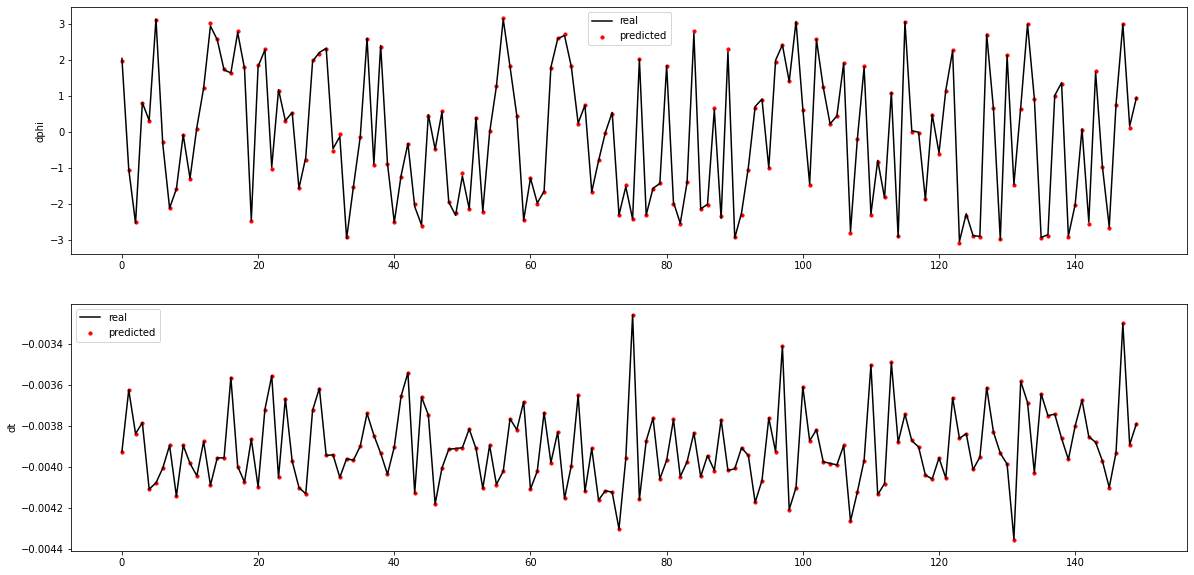

In [51]:
plt.figure(figsize=(20,10))
scatter_size = 10

plt.subplot(2,1,1)
plt.plot(np.arange(len(test_index)), true_dphi,label='real',color='k')
plt.scatter(np.arange(len(test_index)), predicted_dphi,label='predicted',s=scatter_size,color='r')
plt.ylabel('dphi')
plt.legend()


plt.subplot(2,1,2)
plt.plot(np.arange(len(test_index)), true_dt,label='real',color='k')
plt.scatter(np.arange(len(test_index)), predicted_dt,label='predicted',s=scatter_size,color='r')
plt.ylabel('dt')
plt.legend()

Text(0.5, 0, 'dt error')

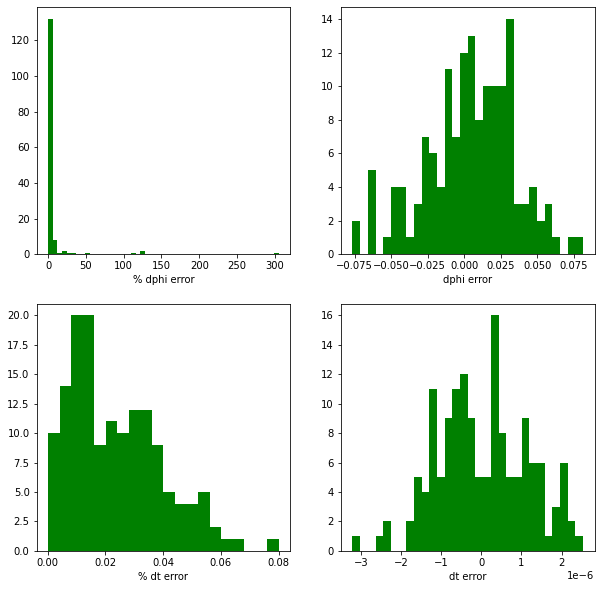

In [60]:
plt.figure(figsize=(10,10))
scatter_size = 10

plt.subplot(2,2,1)
x,xx,xxx = plt.hist(100*abs((true_dphi-predicted_dphi)/true_dphi),color='g',bins=50)
plt.xlabel('% dphi error')
#plt.legend()

plt.subplot(2,2,2)
x,xx,xxx = plt.hist(true_dphi-predicted_dphi,color='g',bins=30)
plt.xlabel('dphi error')


plt.subplot(2,2,3)
x,xx,xxx = plt.hist(100*abs((true_dt-predicted_dt)/true_dt),color='g',bins=20)
plt.xlabel('% dt error')

plt.subplot(2,2,4)
x,xx,xxx = plt.hist(true_dt-predicted_dt,color='g',bins=30)
plt.xlabel('dt error')
#plt.legend()

In [53]:
save_model_name = 'alignmodel_Pv2v4P_8d_q7a5.pickle'
torch.save(mlp, save_model_name)
#mlp = torch.load("my_model.pickle")

In [55]:
aa  = 100*abs((true_dphi-predicted_dphi)/true_dphi)

In [57]:
np.argmax(aa)

54

In [59]:
true_dphi[54],predicted_dphi[54]

(-0.010392335, 0.021309333)